In [295]:
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat

# 1. EDB Score 

In `data/DBData.csv`, you have the full "ease of doing business" dataset from the World Bank. Reformat it into the **Tidy Data** format, so one row is per-year-per-country

Result should look like:

![](EDB_unstack.png)

In [346]:
df = pd.read_csv(r"C:\Users\David\Documents\code\Module 2\m2-5-storytelling\data\DBData.csv")

to_drop = ['Country Code', 'Indicator Code']
df.drop(to_drop, axis=1, inplace=True)


df = pd.melt(df, ['Country Name', 'Indicator Name'], var_name="Year", value_name="Indicator")
df = df.pivot_table(index =['Country Name', 'Year'], columns='Indicator Name').reset_index()

df = df.rename(columns={'Country Name': 'Country'})

df= df.dropna(axis=0, how='all')

# 2 GDP and ease of doing business

Using the additional data in `data/GDPpc.csv`, join the clean dataset in **1** to the GDP data.

**What are the 3 Ease of Doing Business variables most closely linked to GDP?**

Answer by giving their correlation ratio, and give a possible explanation and a data visualization

**hint:** trying to do `df.corr()` or `sns.pairplot()` on the whole dataset will crash most computers. Be smart about the number of columns you're testing at once.

The below three are the most highly correlated variables 
 (Indicator, Paying taxes: Time (hours per year) - Score)                        0.422546
(Indicator, Enforcing contracts (DB04-15 methodology) - Score)                  0.416150
(Indicator, Dealing with construction permits (DB16-19 methodology) - Score)    0.414417
Name: GDP per capita, dtype: float64


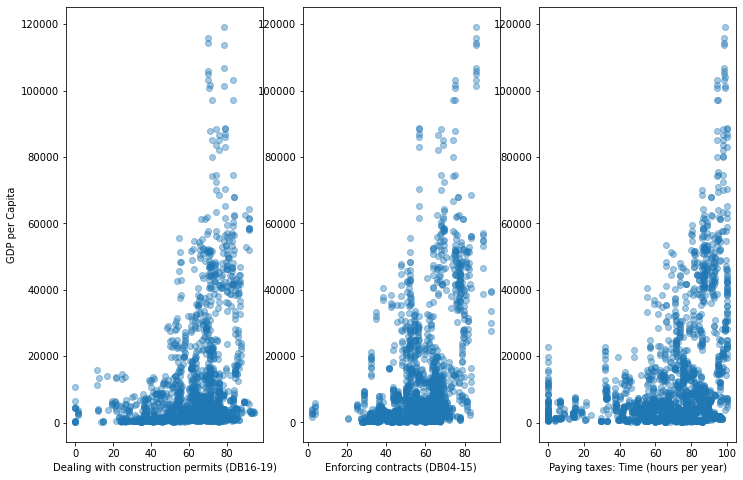

In [417]:
df_ = pd.read_csv(r"C:\Users\David\Documents\code\Module 2\m2-5-storytelling\data\GDPpc.csv")
to_drop = ['Country Code', 'Indicator Code', 'Indicator Name']
df_.drop(to_drop, axis=1, inplace=True)
 
df_ = pd.melt(df_, ['Country Name'], var_name="Year", value_name="GDP per capita")
df_ = df_.rename(columns={'Country Name': 'Country'})

dfy = pd.merge(df,  df_, how='inner', on=['Country', 'Year']) 

#This is a somewhat flawed method as it neglects developping economies. Nonetheless, reducing our dataset down to the 500 most successful economies provides navigable and full information.
temp_df = dfy.dropna(axis=0, how='all')
temp_df = temp_df.nlargest(500, 'GDP per capita')
corr = temp_df.corr()['GDP per capita']
corr = corr.dropna()

print('The below three are the most highly correlated variables \n',corr.sort_values(ascending=False)[1:4])

#To provide full visualizations and verify our findings, lets move back to the whole dataset.
fig, ax = plt.subplots(1,3, figsize=(12, 8))
tempy = pd.DataFrame()
tempy['Dealing with construction permits (DB16-19 methodology)'] = dfy[dfy.columns[4]]
tempy['Enforcing contracts (DB04-15 methodology)'] = dfy[dfy.columns[20]]
tempy['Paying taxes: Time (hours per year)'] = dfy[dfy.columns[91]]
tempy['Year'] = dfy['Year']
tempy['GDP per Capita'] = dfy['GDP per capita']


ax[0].scatter(tempy['Dealing with construction permits (DB16-19 methodology)'], tempy['GDP per Capita'], alpha=0.4)
ax[0].set(xlabel='Dealing with construction permits (DB16-19)', ylabel='GDP per Capita')
ax[1].scatter(tempy['Enforcing contracts (DB04-15 methodology)'], tempy['GDP per Capita'], alpha=0.4)
ax[1].set(xlabel='Enforcing contracts (DB04-15)')
ax[2].scatter(tempy['Paying taxes: Time (hours per year)'], tempy['GDP per Capita'], alpha=0.4)
ax[2].set(xlabel='Paying taxes: Time (hours per year)')

plt.show()

It's worth mentioning that the correlations here are fairly weak and inconclusive. A quick look at the indicators shows that while these are certainly features that support the growth of businesses within a country, they also seem to be fairly obvious features that any economy with the capacity to improve would do. I would guess that these features work against corruption as well. At a guess, I would say that these features do support strong economies, but it is unclear if the relationship is truly correlated in that these features brought a rise in GDP.

# 3. Chocolate Nobel question

In this repository is the academic paper `chocolate_nobel.pdf`. 

Explain in 3 paragraphs why this paper's conclusions are bad statistics.

    *Chocolate Consumption, Cognitive Function, and Nobel Laureates* is a perfect example of the shortcomings of correlation without context. It does so in such a heavy handed way, that I am near certain it is tongue-in-cheek. In short, the paper neglects the possibility of underlying circumstances which could support chocolate consumption and Nobel prize winners in proportion due to its heavy reliance on correlation. In detail, we can understand the shortcomings in three categories: the misapplication of the scientific study, the flawed design of the study, and the improper analysis of the findings.

    The logic behind this analysis is that because flavanols found in chocolate appear to be effective in slowing down a reduction in cognitive function in individual rats, that it should make populations of people smarter. The logic here is unclear. Cognitive ability is not as simple as 'smart'. The cognitive functions improved by flavanols have no clear relation to those which are necessary to win a Nobel Prize, and the author doesn't draw any kind of connection aside from that they both use some kind of cognitive ability.

    In the design and analysis of the results, the oversights become even greater. To start, Nobel prizes won per capita is a horrible indication of the intelligence of the general population. These are small, highly educated teams of individuals that excel in their feild, which is much different than the average intelligence of the population at large. In theory, you could have a population that is mostly illiterate but still win Nobel prizes with a highly educated elite. This problem is reinforced by the fact that the overall chocolate consumption of the population does not mean that the Nobel prize winners consumed any chocolate at all. Finally, in regards to the findings, the author is quick to dismiss the possibility that a third mechanism influences both chocolate consumption and Nobel prize winner, because "since chocolate consumption has been documented to improve cognitive function, it seems most likely that in a dose-dependent way, chocolate intake provides the abundant fertile ground needed forthe sprouting of Nobel laureates." pg.2, which is tenuous logic at best. It is far more likely that this causal relationship exists because developed nations tend to have an appetite for both things. It's likely we could recreate a similar study linking Nobel prize winning country to any number of luxuries.